# Assignment 6: Apply NB

##**<font color= 'red'> Considering  60K points for Assignment </font>**

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper parameter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

In [0]:
#importing all the required packages and modules
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text  import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

## 1.1 Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
#my_preprocessed_data is preprocessed by me which has project_title , project_resource_summary columns in it 
#where as preprocessed_data provided does not contain them

data  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/my_preprocessed_data.csv',nrows= 60000)
data.columns

Index(['Unnamed: 0', 'id', 'teacher_prefix', 'school_state',
       'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity'],
      dtype='object')

In [4]:
#dropping off the columns we don't need for this assignment 
#they are 'Unnamed: 0', 'id' , 'project_resource_summary',
data.drop(columns = ['Unnamed: 0', 'id' , 'project_resource_summary'] , inplace = True)
data.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'essay', 'price', 'quantity'],
      dtype='object')

In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,essay,price,quantity
0,mrs,in,grades_prek_2,literacy_language,esl literacy,educational support english learners home,0,students english learners working english seco...,154.6,23


In [6]:
pd.Series(y).value_counts()

1    50856
0     9144
dtype: int64

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y , random_state =42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train, random_state =42)

###**<font color = 'dark brown'>Types of features</font>**

**Text features:** -->  Bow & Avg w2v

1. essay (Project Essay)
2. project_title
3. project_resource_summary (not needed for NB assignment)

**Categorical features** --> One hot encoding -- Can use BoW

1. school_state 
2. teacher_prefix
3. project_grade_category 
4. project_subject_categories
5. project_subject_subcategories


**Numerical features** --> should be feature scaled or Normalized or standaradized

1. price 
2. teacher_number_of_previously_posted_projects





<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

1.3.1 Encoding project essay

In [8]:
#encoding essay using BoW

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(26934, 10) (26934,)
(13266, 10) (13266,)
(19800, 10) (19800,)
After vectorizations
(26934, 5000) (26934,)
(13266, 5000) (13266,)
(19800, 5000) (19800,)


In [9]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
essay_bow_features = vectorizer.get_feature_names()
print(len(essay_bow_features))

5000


1.3.2 Encoding project title

In [10]:
# check if we have any nan values are there
print(data['project_title'].isnull().values.any())
print("number of nan values",data['project_title'].isnull().values.sum())

True
number of nan values 30


In [11]:
#encoding project_tilte using BoW

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


#As we have 2 null titles in project_title columns after preprocessing using astype('U') as susggested by the error traceback
#check the link  https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_title'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values.astype('U'))
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values.astype('U'))
X_test_title_bow = vectorizer.transform(X_test['project_title'].values.astype('U'))

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

(26934, 10) (26934,)
(13266, 10) (13266,)
(19800, 10) (19800,)
After vectorizations
(26934, 1978) (26934,)
(13266, 1978) (13266,)
(19800, 1978) (19800,)


In [12]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
title_bow_features = vectorizer.get_feature_names()
print(len(title_bow_features))

1978


<h2>1.4 Make Data Model Ready: encoding categorical features</h2>

1.4.1 encoding categorical features: School State

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(26934, 51) (26934,)
(13266, 51) (13266,)
(19800, 51) (19800,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [14]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
state_ohe_features = vectorizer.get_feature_names()
print(len(state_ohe_features))

51


1.4.2 encoding categorical features: teacher_prefix

In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(26934, 5) (26934,)
(13266, 5) (13266,)
(19800, 5) (19800,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [16]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
teacher_ohe_features = vectorizer.get_feature_names()
print(len(teacher_ohe_features))

5


1.4.3 encoding categorical features: project_grade_category

In [17]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(26934, 4) (26934,)
(13266, 4) (13266,)
(19800, 4) (19800,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [18]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
grade_ohe_features = vectorizer.get_feature_names()
print(len(grade_ohe_features))

4


1.4.4 encoding categorical features: project_subject_categories

In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['project_subject_categories'].values)
X_cv_cat_ohe = vectorizer.transform(X_cv['project_subject_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['project_subject_categories'].values)  

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(26934, 9) (26934,)
(13266, 9) (13266,)
(19800, 9) (19800,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [20]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
cat_ohe_features = vectorizer.get_feature_names()
print(len(cat_ohe_features))

9


1.4.5 encoding categorical features: project_subject_subcategories


In [21]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcat_ohe = vectorizer.transform(X_train['project_subject_subcategories'].values)
X_cv_subcat_ohe = vectorizer.transform(X_cv['project_subject_subcategories'].values)
X_test_subcat_ohe = vectorizer.transform(X_test['project_subject_subcategories'].values)  

print("After vectorizations")
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_cv_subcat_ohe.shape, y_cv.shape)
print(X_test_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(26934, 30) (26934,)
(13266, 30) (13266,)
(19800, 30) (19800,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [22]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
subcat_ohe_features = vectorizer.get_feature_names()
print(len(subcat_ohe_features))

30


<h2>1.4.6 Make Data Model Ready: encoding numerical features</h2>

1.4.6.1 encoding numerical features: Price 

In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(26934, 1) (26934,)
(13266, 1) (13266,)
(19800, 1) (19800,)


**Note**

In [24]:
'''
Note:
We can apply standard scaler instead fo normaliser but stdscaler will give the negative values
As Multinomial NB doesn't accept -ve values in training data we are considering the use of Normaliser here.

if Negative values are passed in training data for MultinomialNB then it will throw the below error
ValueError: Negative values in data passed to MultinomialNB (input X) site:stackoverflow.com
'''

"\nNote:\nWe can apply standard scaler instead fo normaliser but stdscaler will give the negative values\nAs Multinomial NB doesn't accept -ve values in training data we are considering the use of Normaliser here.\n\nif Negative values are passed in training data for MultinomialNB then it will throw the below error\nValueError: Negative values in data passed to MultinomialNB (input X) site:stackoverflow.com\n"

1.4.6.2 encoding numerical features: teacher_number_of_previously_posted_projects

In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_pjts_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prev_pjts_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_pjts_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_prev_pjts_norm.shape, y_train.shape)
print(X_cv_prev_pjts_norm.shape, y_cv.shape)
print(X_test_prev_pjts_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(26934, 1) (26934,)
(13266, 1) (13266,)
(19800, 1) (19800,)


### Concatinating all the features (BoW for Essay)

In [26]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# concat(text_features,categorical_features, numerical_features)
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_bow,X_train_title_bow,
               X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_subcat_ohe,
               X_train_price_norm,X_train_prev_pjts_norm)).tocsr()

X_cr = hstack((X_cv_essay_bow,X_cv_title_bow,
               X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_cat_ohe,X_cv_subcat_ohe,
               X_cv_price_norm,X_cv_prev_pjts_norm)).tocsr()

X_te = hstack((X_test_essay_bow,X_test_title_bow,
               X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_subcat_ohe,
               X_test_price_norm,X_test_prev_pjts_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(26934, 7079) (26934,)
(13266, 7079) (13266,)
(19800, 7079) (19800,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [0]:
#creating a batch_predict function which will extract the proba scores of the data batch wise 

def batch_predict(clf, data):
  total = data.shape[0]
  y_data_pred = []
  tr_loop = total - total%1000

  for i in range(0,tr_loop,1000):
    y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])

  if total%1000 != 0:
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
  return y_data_pred

 ##### **1.5.1.1.2 Method 2: Random search**

In [0]:
#Here Hyperparameter is alpha which will be like [0.001,0.01,0.1,1,10,100,1000] in Grid search CV
#Alpha in Ramdomisedsearch CV should be provided using a distribution

In [29]:
'''
Refrences or Blogs for RandomizedSearchCV
How to provide alpha values from a distribution for RandomSearch-CV:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624
https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
'''

'\nRefrences or Blogs for RandomizedSearchCV\nHow to provide alpha values from a distribution for RandomSearch-CV:\nhttps://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html\nhttps://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624\nhttps://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/\nhttps://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/\n'

In [30]:
#If we want to check what are the sample alpha values or hyperparameters that 
# param_dist is providing as input in RandomSearch CV we can use make use of ParameterSampler
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterSampler.html

from sklearn.model_selection import ParameterSampler
from sklearn.utils.fixes import loguniform
param_dist = {'alpha': loguniform(1e-4, 1e4)} #10power(-4)  to 10power(4)
params = list(ParameterSampler({'alpha': loguniform(1e-4, 1e4)}, 10) )
params

[{'alpha': 0.06345615368135199},
 {'alpha': 0.03284255086280866},
 {'alpha': 0.0025722963676680236},
 {'alpha': 0.0017110620299073693},
 {'alpha': 0.050306556511317005},
 {'alpha': 422.21406486610977},
 {'alpha': 0.033844950818226756},
 {'alpha': 0.010104416228108155},
 {'alpha': 0.23977821427559506},
 {'alpha': 0.001914925160853294}]

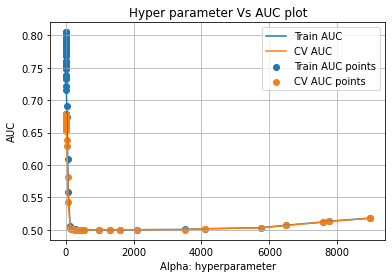


Best hyperparameter (alpha):  0.21037339402934904
Best score:  0.6790828248713475


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.036587,0.000913,0.011335,0.000107,0.000117888,{'alpha': 0.00011788804713256991},0.673081,0.673870,0.662499,0.669817,0.005185,64,0.806322,0.799540,0.808503,0.804788,0.003816
92,0.035683,0.000025,0.011128,0.000023,0.000125788,{'alpha': 0.0001257876141340768},0.673211,0.673951,0.662630,0.669931,0.005171,63,0.806249,0.799468,0.808421,0.804713,0.003813
37,0.036122,0.000106,0.011229,0.000101,0.000131125,{'alpha': 0.0001311251750964475},0.673293,0.673992,0.662716,0.670000,0.005159,62,0.806201,0.799421,0.808366,0.804662,0.003810
9,0.036279,0.000210,0.011593,0.000348,0.000180556,{'alpha': 0.00018055603469416254},0.673896,0.674333,0.663373,0.670534,0.005067,58,0.805812,0.799045,0.807946,0.804268,0.003794
7,0.035842,0.000211,0.011395,0.000069,0.000196778,{'alpha': 0.00019677778434223163},0.674070,0.674414,0.663549,0.670678,0.005043,57,0.805708,0.798939,0.807831,0.804159,0.003792


In [31]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# specify parameters and distributions to sample from  #I did check the best_score_ using loguniform and uniform dist as loguniform is more effeicient I am using loguniform here
param_dist = {'alpha': loguniform(1e-4, 1e4)}           #https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

clf = RandomizedSearchCV(estimator = mnb, param_distributions=param_dist, cv=3, scoring='roc_auc',return_train_score=True , n_iter=100)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
Alpha =  results['param_alpha']

plt.plot(Alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(Alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(Alpha, train_auc, label='Train AUC points')
plt.scatter(Alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

print('\n','='*100)
best_alpha = clf.best_params_['alpha']
print('Best hyperparameter (alpha): ',best_alpha)
print('Best score: ',clf.best_score_)
print('='*100)

results.head()

#### 1.5.1.2 Testing the performance of the model on test data, plotting ROC Curves

In [0]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
#considering best_alpha

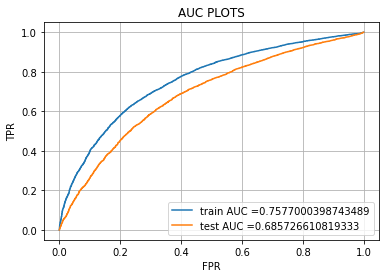



train AUC = 0.7577000398743489
test AUC = 0.685726610819333


In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


mnb = MultinomialNB(alpha = best_alpha)
mnb.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(mnb, X_tr)    
y_test_pred = batch_predict(mnb, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS")
plt.grid()
plt.show()

print('\n')
print("train AUC = "+str(auc(train_fpr, train_tpr)))
print("test AUC = "+str(auc(test_fpr, test_tpr)))

In [0]:
# we are writing our own function for predict, with defined threshould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [35]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.48523995904981215 for threshold 0.864
Train confusion matrix
[[ 2914  1190]
 [ 7228 15602]]
Test confusion matrix
[[ 1896  1122]
 [ 5635 11147]]


#### 1.5.1.3  Top 20 features 

In [36]:
# https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p
# https://stats.stackexchange.com/questions/266031/what-is-log-probability-of-feature-in-sklearn-multinomialnb

#bulding the feature_names list 
features_list = list(essay_bow_features+title_bow_features
                     +state_ohe_features+teacher_ohe_features+grade_ohe_features+cat_ohe_features+subcat_ohe_features
                     +['price']+['teacher_number_of_previously_posted_projects'])

print('Total_features: ',len(features_list))  #this shud match with len(X_tr)

Total_features:  7079


In [37]:
#Demo on how argsort works
#find top 3 elements indices of an array

l = np.array([0,50,20,10,80])
print(l)
print(l.argsort())
top3_ele_indices = l.argsort()[-3:][::-1]
print(top3_ele_indices)

#selecting top ele of that array --> ans shud be [80,50,20]
print([l[i] for i in top3_ele_indices])

[ 0 50 20 10 80]
[0 3 2 1 4]
[4 1 2]
[80, 50, 20]


In [0]:
# Here .argsort() will give indexes of features sorted with their log-probabilities

# For negative class
top_20_indices_0 = mnb.feature_log_prob_[0, :].argsort()[-20:][::-1]

# For positive class
top_20_indices_1 = mnb.feature_log_prob_[1, :].argsort()[-20:][::-1]

In [0]:
#extracting top 20 features for both classes with the feature imp in the increasing order
# top_3_features = [f1,f2,f3] means order of importance f1>f2>f3. f1 is most imp

top_20_features_0 = []
top_20_features_1 = []

for i in top_20_indices_0:
  top_20_features_0.append(features_list[i])

for i in top_20_indices_1:
  top_20_features_1.append(features_list[i])

In [40]:
print(top_20_features_0)
print('-'*100)
print(top_20_features_1)

['students', 'school', 'learning', 'classroom', 'learn', 'not', 'help', 'price', 'nannan', 'many', 'need', 'work', 'come', 'teacher_number_of_previously_posted_projects', 'skills', 'love', 'materials', 'reading', 'able', 'day']
----------------------------------------------------------------------------------------------------
['students', 'school', 'learning', 'classroom', 'not', 'learn', 'help', 'price', 'many', 'nannan', 'reading', 'need', 'work', 'use', 'teacher_number_of_previously_posted_projects', 'love', 'day', 'able', 'come', 'class']


### Concatinating all the features (TF-IDF for Essay)

1.3.2 Encoding Essay using TFIDF

In [0]:
#encoding essay using TFIDF vectorizer
from sklearn.feature_extraction.text  import TfidfVectorizer

In [42]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(26934, 10) (26934,)
(13266, 10) (13266,)
(19800, 10) (19800,)
After vectorizations
(26934, 5000) (26934,)
(13266, 5000) (13266,)
(19800, 5000) (19800,)


In [43]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
essay_tfidf_features = vectorizer.get_feature_names()
print(len(essay_bow_features))

5000


1.3.2 Encoding project title using TF-IDF

In [44]:
# check if we have any nan values are there
print(data['project_title'].isnull().values.any())
print("number of nan values",data['project_title'].isnull().values.sum())

True
number of nan values 30


In [45]:
#encoding project_tilte using TFIDF

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


#As we have 2 null titles in project_title columns after preprocessing using astype('U') as susggested by the error traceback
#check the link  https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_title'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values.astype('U'))
X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'].values.astype('U'))
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values.astype('U'))

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

(26934, 10) (26934,)
(13266, 10) (13266,)
(19800, 10) (19800,)
After vectorizations
(26934, 1978) (26934,)
(13266, 1978) (13266,)
(19800, 1978) (19800,)


In [46]:
#getting the features_list to calculate top 20 features using feature_log_probabilities
title_tfidf_features = vectorizer.get_feature_names()
print(len(title_bow_features))

1978


### Concatinating 

In [47]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# concat(text_features,categorical_features, numerical_features)
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf,
               X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_subcat_ohe,
               X_train_price_norm,X_train_prev_pjts_norm)).tocsr()

X_cr = hstack((X_cv_essay_tfidf,X_cv_title_tfidf,
               X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_cat_ohe,X_cv_subcat_ohe,
               X_cv_price_norm,X_cv_prev_pjts_norm)).tocsr()

X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf,
               X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_subcat_ohe,
               X_test_price_norm,X_test_prev_pjts_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(26934, 7079) (26934,)
(13266, 7079) (13266,)
(19800, 7079) (19800,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [0]:
#creating a batch_predict function which will extract the proba scores of the data batch wise 

def batch_predict(clf, data):
  total = data.shape[0]
  y_data_pred = []
  tr_loop = total - total%1000

  for i in range(0,tr_loop,1000):
    y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])

  if total%1000 != 0:
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
  return y_data_pred

 ##### **1.5.1.1.2 Method 2: Random search**

In [0]:
#Here Hyperparameter is alpha which will be like [0.001,0.01,0.1,1,10,100,1000] in Grid search CV
#Alpha in Ramdomisedsearch CV should be provided using a distribution

In [50]:
'''
Refrences or Blogs for RandomizedSearchCV
How to provide alpha values from a distribution for RandomSearch-CV:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624
https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
'''

'\nRefrences or Blogs for RandomizedSearchCV\nHow to provide alpha values from a distribution for RandomSearch-CV:\nhttps://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html\nhttps://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624\nhttps://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/\nhttps://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/\n'

In [51]:
#If we want to check what are the sample alpha values or hyperparameters that 
# param_dist is providing as input in RandomSearch CV we can use make use of ParameterSampler
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterSampler.html

from sklearn.model_selection import ParameterSampler
from sklearn.utils.fixes import loguniform
param_dist = {'alpha': loguniform(1e-4, 1e4)} #10power(-4)  to 10power(4)
params = list(ParameterSampler({'alpha': loguniform(1e-4, 1e4)}, 10) )
params

[{'alpha': 4.316905104454054},
 {'alpha': 11.603035953381415},
 {'alpha': 0.003035979623525679},
 {'alpha': 8.286966447782625},
 {'alpha': 0.5410327671030936},
 {'alpha': 943.2839048947219},
 {'alpha': 0.007421794845650225},
 {'alpha': 0.002768255645460582},
 {'alpha': 0.4649929133650643},
 {'alpha': 0.0002354853210597728}]

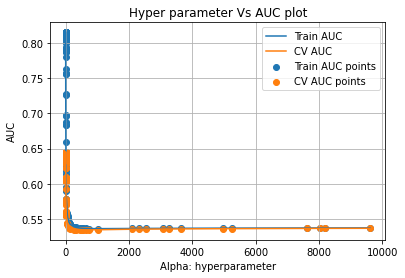


Best hyperparameter (alpha):  0.35825347910663236
Best score:  0.6454869195912837


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
79,0.030111,0.000211,0.010642,0.000053,0.000141811,{'alpha': 0.00014181149708404497},0.627602,0.640893,0.617960,0.628819,0.009402,52,0.819076,0.810817,0.814856,0.814917,0.003372
88,0.030248,0.000348,0.010691,0.000224,0.000160037,{'alpha': 0.000160037453080247},0.627665,0.640933,0.618000,0.628866,0.009401,51,0.819074,0.810815,0.814853,0.814914,0.003372
19,0.031137,0.000295,0.010853,0.000131,0.00023994,{'alpha': 0.00023993956428498622},0.627907,0.641056,0.618142,0.629035,0.009389,50,0.819061,0.810805,0.814838,0.814902,0.003371
81,0.029995,0.000389,0.010675,0.000055,0.000249393,{'alpha': 0.00024939318333821304},0.627931,0.641069,0.618161,0.629054,0.009386,49,0.819060,0.810804,0.814836,0.814900,0.003371
80,0.030367,0.000195,0.010644,0.000214,0.000387544,{'alpha': 0.0003875438812465845},0.628229,0.641230,0.618358,0.629272,0.009367,48,0.819041,0.810789,0.814813,0.814881,0.003369


In [52]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# specify parameters and distributions to sample from  #I did check the best_score_ using loguniform and uniform dist as loguniform is more effeicient I am using loguniform here
param_dist = {'alpha': loguniform(1e-4, 1e4)}           #https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

clf = RandomizedSearchCV(estimator = mnb, param_distributions=param_dist, cv=3, scoring='roc_auc',return_train_score=True , n_iter=100)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
Alpha =  results['param_alpha']

plt.plot(Alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(Alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(Alpha, train_auc, label='Train AUC points')
plt.scatter(Alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

print('\n','='*100)
best_alpha = clf.best_params_['alpha']
print('Best hyperparameter (alpha): ',best_alpha)
print('Best score: ',clf.best_score_)
print('='*100)

results.head()

#### 1.5.1.2 Testing the performance of the model on test data, plotting ROC Curves

In [0]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
# considering best_alpha

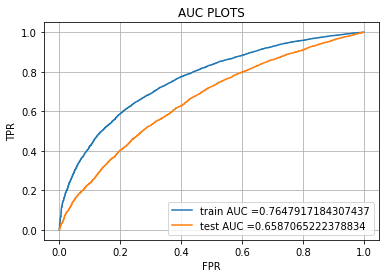



train AUC = 0.7647917184307437
test AUC = 0.6587065222378834


In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


mnb = MultinomialNB(alpha = best_alpha)
mnb.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(mnb, X_tr)    
y_test_pred = batch_predict(mnb, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS")
plt.grid()
plt.show()

print('\n')
print("train AUC = "+str(auc(train_fpr, train_tpr)))
print("test AUC = "+str(auc(test_fpr, test_tpr)))

In [0]:
# we are writing our own function for predict, with defined threshould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [56]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.48575297840893666 for threshold 0.855
Train confusion matrix
[[ 2985  1119]
 [ 7583 15247]]
Test confusion matrix
[[ 1773  1245]
 [ 6032 10750]]


#### 1.5.1.3  Top 20 features 

In [57]:
# https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p
# https://stats.stackexchange.com/questions/266031/what-is-log-probability-of-feature-in-sklearn-multinomialnb

#bulding the feature_names list 
features_list = list(essay_tfidf_features+title_tfidf_features
                     +state_ohe_features+teacher_ohe_features+grade_ohe_features+cat_ohe_features+subcat_ohe_features
                     +['price']+['teacher_number_of_previously_posted_projects'])

print('Total_features: ',len(features_list))  #this shud match with len(X_tr)

Total_features:  7079


In [58]:
#Demo on how argsort works
#find top 3 elements indices of an array

l = np.array([0,50,20,10,80])
print(l)
print(l.argsort())
top3_ele_indices = l.argsort()[-3:][::-1]
print(top3_ele_indices)

#selecting top ele of that array --> ans shud be [80,50,20]
print([l[i] for i in top3_ele_indices])

[ 0 50 20 10 80]
[0 3 2 1 4]
[4 1 2]
[80, 50, 20]


In [0]:
# Here .argsort() will give indexes of features sorted with their log-probabilities

# For negative class
top_20_indices_0 = mnb.feature_log_prob_[0, :].argsort()[-20:][::-1]

# For positive class
top_20_indices_1 = mnb.feature_log_prob_[1, :].argsort()[-20:][::-1]

In [0]:
#extracting top 20 features for both classes with the feature imp in the increasing order
# top_3_features = [f1,f2,f3] means order of importance f1>f2>f3. f1 is most imp

top_20_features_0 = []
top_20_features_1 = []

for i in top_20_indices_0:
  top_20_features_0.append(features_list[i])

for i in top_20_indices_1:
  top_20_features_1.append(features_list[i])

In [61]:
print(top_20_features_0)
print('-'*100)
print(top_20_features_1)

['price', 'teacher_number_of_previously_posted_projects', 'mrs', 'literacy_language', 'grades_prek_2', 'math_science', 'ms', 'grades_3_5', 'literacy', 'mathematics', 'literature_writing', 'grades_6_8', 'specialneeds', 'specialneeds', 'appliedlearning', 'health_sports', 'ca', 'students', 'appliedsciences', 'grades_9_12']
----------------------------------------------------------------------------------------------------
['price', 'teacher_number_of_previously_posted_projects', 'mrs', 'literacy_language', 'grades_prek_2', 'math_science', 'ms', 'grades_3_5', 'literacy', 'mathematics', 'literature_writing', 'grades_6_8', 'ca', 'health_sports', 'students', 'specialneeds', 'specialneeds', 'appliedlearning', 'grades_9_12', 'mr']


###3. Summary

In [66]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Vectorizer','Model', 'HyperParameter- Alpha','AUC'],
            ['Bow','RandomSearch CV',0.21037339402934904 ,0.685726610819333],
            ['TF-IDF','RandomSearch CV',0.35825347910663236 ,0.6587065222378834]])
print(t.draw())

+------------+-----------------+-----------------------+-------+
| Vectorizer |      Model      | HyperParameter- Alpha |  AUC  |
+============+=================+=======================+=======+
| Bow        | RandomSearch CV | 0.210                 | 0.686 |
+------------+-----------------+-----------------------+-------+
| TF-IDF     | RandomSearch CV | 0.358                 | 0.659 |
+------------+-----------------+-----------------------+-------+
